In [13]:
import pandas as pd

df = pd.read_excel('/home/ubuntu/cur/isep/coding_munic..v.4.xlsx', sheet_name='Sheet1')
df.head()

,Unnamed: 0,*CLAUSE_EXPLANATION,*CLAUSE_POSITIVE_PERMISSION_CONSENT,*CLAUSE_PENALTY_Lv2,*CLAUSE_PENALTY_Lv1,*CLAUSE_RESTRICTED_ZONE,*CLAUSE_ZONE_Lv1,*CLAUSE_ZONE_Lv2,*CLAUSE_ENVIRONMENT,*CLAUSE_DOC_REQUIREMENTS,...,*GUARD_EXCEPTION_TADASHI,*PROCEDURE_NOTICE_MUNICIPARITY,*PROCEDURE_CONSULTAION,*PROCEDURE_NOTICE_OPERATOR,*PROCEDURE_TIMING,*STAKEHOLDER_RESIDENTS,*CLAUSE_STAKEHOLDER_CONFIRMATION,*STAKEHOLDER_LANDOWNER,*GEO_REFERENCES,ケース数
0,えりも町,2 (1.40%),0 (0.00%),0 (0.00%),19 (13.29%),1 (0.70%),0 (0.00%),0 (0.00%),15 (10.49%),0 (0.00%),...,0 (0.00%),6 (4.20%),15 (10.49%),22 (15.38%),7 (4.90%),20 (13.99%),1 (0.70%),0 (0.00%),1 (0.70%),143
1,かすみがうら市,1 (0.81%),0 (0.00%),0 (0.00%),6 (4.88%),0 (0.00%),0 (0.00%),0 (0.00%),12 (9.76%),0 (0.00%),...,0 (0.00%),7 (5.69%),8 (6.50%),23 (18.70%),6 (4.88%),5 (4.07%),0 (0.00%),0 (0.00%),0 (0.00%),123
2,かつらぎ町,0 (0.00%),0 (0.00%),0 (0.00%),12 (12.24%),0 (0.00%),0 (0.00%),0 (0.00%),4 (4.08%),0 (0.00%),...,0 (0.00%),2 (2.04%),10 (10.20%),26 (26.53%),6 (6.12%),10 (10.20%),0 (0.00%),0 (0.00%),0 (0.00%),98
3,さくら市,10 (6.17%),6 (3.70%),0 (0.00%),19 (11.73%),0 (0.00%),7 (4.32%),0 (0.00%),17 (10.49%),3 (1.85%),...,0 (0.00%),7 (4.32%),0 (0.00%),32 (19.75%),1 (0.62%),9 (5.56%),1 (0.62%),0 (0.00%),3 (1.85%),162
4,つくば市,16 (7.41%),0 (0.00%),0 (0.00%),18 (8.33%),2 (0.93%),8 (3.70%),6 (2.78%),14 (6.48%),0 (0.00%),...,0 (0.00%),4 (1.85%),0 (0.00%),30 (13.89%),8 (3.70%),10 (4.63%),0 (0.00%),0 (0.00%),4 (1.85%),216


In [14]:
import re

# 個数とパーセンテージを分離する関数
def split_count_and_ratio(value):
    if pd.isna(value):
        return 0, 0.0
    
    # 文字列として処理
    value_str = str(value)
    
    # パターン: "個数 (パーセント%)"
    match = re.match(r'(\d+)\s*\((\d+\.?\d*)%\)', value_str)
    if match:
        count = int(match.group(1))
        ratio = float(match.group(2))
        return count, ratio
    else:
        # パースできない場合は元の値を返す
        return value, 0.0

# 'Unnamed: 0'と'ケース数'以外の列を処理
columns_to_process = [col for col in df.columns if col not in ['Unnamed: 0', 'ケース数']]

# 新しいデータフレームを作成
new_df = df[['Unnamed: 0']].copy()

for col in columns_to_process:
    # 個数とパーセンテージを分離
    counts, ratios = zip(*df[col].apply(split_count_and_ratio))
    
    # 個数の列
    new_df[col] = counts
    
    # パーセンテージの列(ratio)
    new_df[f'{col}_ratio(%)'] = ratios

# 最後に'ケース数'を追加
new_df['ケース数'] = df['ケース数']

# 結果を確認

new_df.to_csv("result2.2.csv")
new_df.head()

,Unnamed: 0,*CLAUSE_EXPLANATION,*CLAUSE_EXPLANATION_ratio(%),*CLAUSE_POSITIVE_PERMISSION_CONSENT,*CLAUSE_POSITIVE_PERMISSION_CONSENT_ratio(%),*CLAUSE_PENALTY_Lv2,*CLAUSE_PENALTY_Lv2_ratio(%),*CLAUSE_PENALTY_Lv1,*CLAUSE_PENALTY_Lv1_ratio(%),*CLAUSE_RESTRICTED_ZONE,...,*PROCEDURE_TIMING_ratio(%),*STAKEHOLDER_RESIDENTS,*STAKEHOLDER_RESIDENTS_ratio(%),*CLAUSE_STAKEHOLDER_CONFIRMATION,*CLAUSE_STAKEHOLDER_CONFIRMATION_ratio(%),*STAKEHOLDER_LANDOWNER,*STAKEHOLDER_LANDOWNER_ratio(%),*GEO_REFERENCES,*GEO_REFERENCES_ratio(%),ケース数
0,えりも町,2,1.40,0,0.0,0,0.0,19,13.29,1,...,4.90,20,13.99,1,0.70,0,0.0,1,0.70,143
1,かすみがうら市,1,0.81,0,0.0,0,0.0,6,4.88,0,...,4.88,5,4.07,0,0.00,0,0.0,0,0.00,123
2,かつらぎ町,0,0.00,0,0.0,0,0.0,12,12.24,0,...,6.12,10,10.20,0,0.00,0,0.0,0,0.00,98
3,さくら市,10,6.17,6,3.7,0,0.0,19,11.73,0,...,0.62,9,5.56,1,0.62,0,0.0,3,1.85,162
4,つくば市,16,7.41,0,0.0,0,0.0,18,8.33,2,...,3.70,10,4.63,0,0.00,0,0.0,4,1.85,216


# ピアソン残差の計算と分析

## 1. データの前処理

合計行とカイ2乗値行を除外し、ピアソン残差を計算します。

In [15]:
import numpy as np
from scipy.stats import chi2_contingency

# 合計行とカイ2乗値行を除外(最後の2行)
df_analysis = new_df.iloc[:-2].copy()

# 数値列を数値型に変換(自治体名以外)
numeric_columns = [col for col in df_analysis.columns if col != 'Unnamed: 0']
for col in numeric_columns:
    df_analysis[col] = pd.to_numeric(df_analysis[col], errors='coerce').fillna(0)

# カウント列は整数型に(比率列以外)
count_columns = [col for col in numeric_columns if '_ratio(%)' not in col and col != 'ケース数']
for col in count_columns:
    df_analysis[col] = df_analysis[col].astype(int)

# ケース数も整数型に
df_analysis['ケース数'] = df_analysis['ケース数'].astype(int)

# 自治体名列を確認
print("分析対象自治体数:", len(df_analysis))
print("\n最初の5自治体:")
print(df_analysis['Unnamed: 0'].head())

# データ型を確認
print("\nデータ型(最初の10列):")
print(df_analysis.dtypes.head(10))

分析対象自治体数: 312

最初の5自治体:
0       えりも町
1    かすみがうら市
2      かつらぎ町
3       さくら市
4       つくば市
Name: Unnamed: 0, dtype: object

データ型(最初の10列):
Unnamed: 0                                       object
*CLAUSE_EXPLANATION                               int64
*CLAUSE_EXPLANATION_ratio(%)                    float64
*CLAUSE_POSITIVE_PERMISSION_CONSENT               int64
*CLAUSE_POSITIVE_PERMISSION_CONSENT_ratio(%)    float64
*CLAUSE_PENALTY_Lv2                               int64
*CLAUSE_PENALTY_Lv2_ratio(%)                    float64
*CLAUSE_PENALTY_Lv1                               int64
*CLAUSE_PENALTY_Lv1_ratio(%)                    float64
*CLAUSE_RESTRICTED_ZONE                           int64
dtype: object


In [16]:
# ピアソン残差を計算する関数
def calculate_pearson_residuals(df_data):
    """
    各コーディング項目についてピアソン残差を計算
    
    Parameters:
    -----------
    df_data : DataFrame
        自治体×コーディング項目のカウントデータ
    
    Returns:
    --------
    df_with_residuals : DataFrame
        ピアソン残差列を追加したデータフレーム
    """
    # 結果を格納するデータフレーム
    df_result = df_data.copy()
    
    # カウント列のみを抽出(比率列とケース数は除外)
    count_columns = [col for col in df_data.columns 
                     if col not in ['Unnamed: 0', 'ケース数'] 
                     and '_ratio(%)' not in col]
    
    # 各カウント列についてピアソン残差を計算
    for col in count_columns:
        # クロス集計表を作成(自治体 × 当該コーディングの有無)
        # 各自治体の当該コーディング出現回数と非出現回数
        present = df_data[col].values
        total_cases = df_data['ケース数'].values
        absent = total_cases - present
        
        # クロス集計表
        contingency_table = np.column_stack([present, absent])
        
        # カイ2乗検定
        try:
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            
            # ピアソン残差を計算: (観測度数 - 期待度数) / sqrt(期待度数)
            pearson_resid = (present - expected[:, 0]) / np.sqrt(expected[:, 0])
            
            # 残差列を追加
            df_result[f'{col}_pearson_resid'] = pearson_resid
            
        except Exception as e:
            print(f"警告: {col} の計算中にエラー: {e}")
            df_result[f'{col}_pearson_resid'] = 0.0
    
    return df_result

# ピアソン残差を計算
print("ピアソン残差を計算中...")
df_with_residuals = calculate_pearson_residuals(df_analysis)

print(f"\n計算完了。列数: {len(df_with_residuals.columns)}")
print("\n追加された残差列の例:")
residual_cols = [col for col in df_with_residuals.columns if 'pearson_resid' in col]
print(residual_cols[:5])

ピアソン残差を計算中...

計算完了。列数: 83

追加された残差列の例:
['*CLAUSE_EXPLANATION_pearson_resid', '*CLAUSE_POSITIVE_PERMISSION_CONSENT_pearson_resid', '*CLAUSE_PENALTY_Lv2_pearson_resid', '*CLAUSE_PENALTY_Lv1_pearson_resid', '*CLAUSE_RESTRICTED_ZONE_pearson_resid']


In [17]:
# 自治体名列をわかりやすい名前に変更
df_with_residuals = df_with_residuals.rename(columns={'Unnamed: 0': 'Municiparity_name'})

# 結果を確認
print("データの形状:", df_with_residuals.shape)
print("\n最初の3自治体のデータ(抜粋):")
display_cols = ['Municiparity_name', 
                '*CLAUSE_POSITIVE_PERMISSION_CONSENT',
                '*CLAUSE_POSITIVE_PERMISSION_CONSENT_pearson_resid',
                '*CLAUSE_ZONE_Lv1',
                '*CLAUSE_ZONE_Lv1_pearson_resid',
                '*CLAUSE_ZONE_Lv2',
                '*CLAUSE_ZONE_Lv2_pearson_resid',
                'ケース数']

df_with_residuals[display_cols].head(3)

データの形状: (312, 83)

最初の3自治体のデータ(抜粋):


,Municiparity_name,*CLAUSE_POSITIVE_PERMISSION_CONSENT,*CLAUSE_POSITIVE_PERMISSION_CONSENT_pearson_resid,*CLAUSE_ZONE_Lv1,*CLAUSE_ZONE_Lv1_pearson_resid,*CLAUSE_ZONE_Lv2,*CLAUSE_ZONE_Lv2_pearson_resid,ケース数
0,えりも町,0,-1.507312,0,-2.200707,0,-0.973271,143
1,かすみがうら市,0,-1.397937,0,-2.041018,0,-0.902647,123
2,かつらぎ町,0,-1.247809,0,-1.821828,0,-0.805710,98


In [18]:
# ピアソン残差の統計情報
residual_cols = [col for col in df_with_residuals.columns if 'pearson_resid' in col]

print("ピアソン残差の統計情報:")
print(df_with_residuals[residual_cols].describe())

# 顕著な正の残差(>1.0)を持つ項目を確認
print("\n\n顕著な正の残差(>1.0)を持つケース数:")
for col in residual_cols:
    count = (df_with_residuals[col] > 1.0).sum()
    if count > 0:
        print(f"{col}: {count}件")

ピアソン残差の統計情報:
       *CLAUSE_EXPLANATION_pearson_resid  \
count                         312.000000   
mean                            0.039738   
std                             1.240534   
min                            -3.426832   
25%                            -0.841132   
50%                             0.017599   
75%                             0.836562   
max                             4.272201   

       *CLAUSE_POSITIVE_PERMISSION_CONSENT_pearson_resid  \
count                                         312.000000   
mean                                           -0.061723   
std                                             1.751976   
min                                            -2.431121   
25%                                            -1.323499   
50%                                            -1.027823   
75%                                             1.069538   
max                                             6.895901   

       *CLAUSE_PENALTY_Lv2_pearson_resid  *CLAUSE

In [19]:
# CSVファイルとして保存(ピアソン残差込み)
output_path = '/home/ubuntu/cur/isep/result_solar_rule_gof_tests.csv'
df_with_residuals.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"ピアソン残差を含むデータを保存しました: {output_path}")

ピアソン残差を含むデータを保存しました: /home/ubuntu/cur/isep/result_solar_rule_gof_tests.csv


## 2. 許可制 vs 届出制の判定

`CLAUSE_POSITIVE_PERMISSION_CONSENT`(許可・承認)と`PROCEDURE_NOTICE_OPERATOR`(届出)の出現頻度とPearson残差を組み合わせて、各自治体の規制タイプを判定します。

**判定基準:**
- **Pearson残差を考慮**: 残差が正(+1.0以上)の場合、その条項が自治体で特徴的に重視されていると判断
- **許可制優位**: 
  - 許可のPearson残差 > 1.0、または
  - 許可 > 0 かつ (届出 = 0 または 許可/届出 ≥ 0.5)
- **届出制優位**: 
  - 届出のPearson残差 > 1.0 かつ 許可のPearson残差 < 1.0、または
  - 許可 = 0 かつ 届出 > 0
- **混合型**: 上記以外

In [20]:
def classify_regulation_type(row):
    """許可制・届出制の分類関数
    
    法律文書では「許可」という文言は慎重に使用されるため、
    出現回数とPearson残差を組み合わせて判定する。
    """
    permission = row['*CLAUSE_POSITIVE_PERMISSION_CONSENT']
    notice = row['*PROCEDURE_NOTICE_OPERATOR']
    permission_resid = row['*CLAUSE_POSITIVE_PERMISSION_CONSENT_pearson_resid']
    notice_resid = row['*PROCEDURE_NOTICE_OPERATOR_pearson_resid']
    
    # 両方とも0の場合
    if notice == 0 and permission == 0:
        return '規定なし'
    
    # Pearson残差が大きい(+1.0以上)場合、その条項が特徴的に重視されている
    # 許可のPearson残差が顕著に正の場合、許可制優位
    if permission_resid > 1.0:
        return '許可制優位'
    
    # 届出のPearson残差が顕著に正で、許可が特徴的でない場合、届出制優位
    if notice_resid > 1.0 and permission_resid < 1.0:
        return '届出制優位'
    
    # Pearson残差が決定的でない場合、カウント数で判定
    if permission > 0:
        if notice == 0:
            return '許可制優位'
        ratio = permission / notice
        # 許可が届出の半分以上あれば、許可制の意図があると判断
        if ratio >= 0.5:
            return '許可制優位'
        else:
            return '混合型'
    else:
        # 許可が0で届出のみの場合
        return '届出制優位'

# 分類の適用
df_with_residuals['規制タイプ'] = df_with_residuals.apply(classify_regulation_type, axis=1)

# 結果の表示
regulation_summary = df_with_residuals[['Municiparity_name', 
                                '*CLAUSE_POSITIVE_PERMISSION_CONSENT',
                                '*CLAUSE_POSITIVE_PERMISSION_CONSENT_pearson_resid',
                                '*PROCEDURE_NOTICE_OPERATOR',
                                '*PROCEDURE_NOTICE_OPERATOR_pearson_resid',
                                '規制タイプ']].copy()
regulation_summary.columns = ['自治体', '許可関連', '許可(残差)', '届出関連', '届出(残差)', '規制タイプ']
# 残差を小数点第2位まで表示
regulation_summary['許可(残差)'] = regulation_summary['許可(残差)'].round(2)
regulation_summary['届出(残差)'] = regulation_summary['届出(残差)'].round(2)
print(regulation_summary.to_string(index=False))

print("\n\n規制タイプの分布:")
print(df_with_residuals['規制タイプ'].value_counts())

    自治体  許可関連  許可(残差)  届出関連  届出(残差) 規制タイプ
   えりも町     0   -1.51    22   -0.83 届出制優位
かすみがうら市     0   -1.40    23    0.09 届出制優位
  かつらぎ町     0   -1.25    26    1.89 届出制優位
   さくら市     6    2.14    32    0.42 許可制優位
   つくば市     0   -1.85    30   -1.53 届出制優位
  ときがわ町     0   -1.51    50    4.59 届出制優位
   みどり市    10    3.37    24   -2.74 許可制優位
  みなかみ町     5    1.53    34    0.82 許可制優位
   みやこ町     0   -1.30    26    1.44 届出制優位
   ニセコ町     0   -1.34    35    3.13 届出制優位
    阿智村     7    3.05    23   -0.77 許可制優位
    愛南町     1   -0.35    16   -0.08   混合型
     綾町     5    2.16    25    0.47 許可制優位
    安中市     2   -0.33    15   -2.62   混合型
   安曇野市     7    2.83    19   -1.86 許可制優位
    安平町     0   -1.24    21    0.76 届出制優位
    伊達市     8    4.16    42    3.77 許可制優位
    伊東市     2    0.10    15   -1.40   混合型
  伊豆の国市     2    0.30    15   -0.86   混合型
    伊豆市     3    0.69    26    0.56   混合型
    伊那市     6    3.62    10   -1.81 許可制優位
    伊方町     3    0.76    25    0.55   混合型
   伊万里市     3    1.18    16   -0.4

## 3. 区域設定の類型化

`CLAUSE_ZONE_Lv1`(抑制区域)と`CLAUSE_ZONE_Lv2`(禁止区域)の設定状況とPearson残差を組み合わせて、区域規制の類型を判定します。

**判定基準:**
- **Pearson残差を考慮**: 残差が正(+1.0以上)の場合、その区域設定が自治体で特徴的に重視されていると判断
- **禁止地区制**: 
  - 禁止区域のPearson残差 > 1.0、または
  - Lv2 > 0 かつ Lv1 < Lv2 × 2
- **抑制地区制**: 
  - 抑制区域のPearson残差 > 1.0 かつ 禁止区域のPearson残差 < 1.0、または
  - Lv2 = 0 かつ Lv1 ≥ 3
- **2層構造**: Lv1 ≥ 3 かつ Lv2 ≥ 3

In [21]:
# 禁止区域の程度を数値化する指標を追加
# 禁止区域比率 = Lv2 / (Lv1 + Lv2)
df_with_residuals['禁止区域比率'] = (
    df_with_residuals['*CLAUSE_ZONE_Lv2'] / 
    (df_with_residuals['*CLAUSE_ZONE_Lv1'] + df_with_residuals['*CLAUSE_ZONE_Lv2'])
).fillna(0)

# 正規化された禁止区域の強度(ケース数あたり)
df_with_residuals['禁止区域強度(正規化)'] = (
    df_with_residuals['*CLAUSE_ZONE_Lv2'] / df_with_residuals['ケース数'] * 100
)

print("禁止区域の程度を示す指標を追加しました:")
print("\n禁止区域比率の統計:")
print(df_with_residuals['禁止区域比率'].describe())
print("\n禁止区域強度(正規化)の統計:")
print(df_with_residuals['禁止区域強度(正規化)'].describe())

禁止区域の程度を示す指標を追加しました:

禁止区域比率の統計:
count    312.000000
mean       0.146490
std        0.285728
min        0.000000
25%        0.000000
50%        0.000000
75%        0.148810
max        1.000000
Name: 禁止区域比率, dtype: float64

禁止区域強度(正規化)の統計:
count    312.000000
mean       0.689386
std        1.415516
min        0.000000
25%        0.000000
50%        0.000000
75%        0.755343
max        8.000000
Name: 禁止区域強度(正規化), dtype: float64


In [22]:
def classify_zone_type(row):
    """区域設定の類型化関数
    
    法律文書では「禁止」という文言は慎重に使用されるため、
    出現回数とPearson残差を組み合わせて判定する。
    
    【変更点】'2層構造(禁止+抑制)'と'抑制地区制(禁止区域含む)'を統合し、
    '2層構造(抑制+禁止)'として分類。禁止区域の程度は別途「禁止区域比率」で保持。
    """
    lv1 = row['*CLAUSE_ZONE_Lv1']  # 抑制区域
    lv2 = row['*CLAUSE_ZONE_Lv2']  # 禁止区域
    lv1_resid = row['*CLAUSE_ZONE_Lv1_pearson_resid']
    lv2_resid = row['*CLAUSE_ZONE_Lv2_pearson_resid']
    
    # 両方とも0の場合
    if lv1 == 0 and lv2 == 0:
        return '区域設定なし'
    
    # Pearson残差が大きい(+1.0以上)場合、その区域設定が特徴的に重視されている
    # 禁止区域のPearson残差が顕著に正の場合、禁止地区制
    if lv2_resid > 1.0:
        # ただし、両方が一定以上あれば2層構造
        if lv1 >= 3 and lv2 >= 3:
            return '2層構造(抑制+禁止)'
        else:
            return '禁止地区制'
    
    # 抑制区域のPearson残差が顕著に正で、禁止が特徴的でない場合
    if lv1_resid > 1.0 and lv2_resid < 1.0:
        # 禁止区域を含む場合も、統合して2層構造として扱う
        if lv2 > 0:
            return '2層構造(抑制+禁止)'
        else:
            return '抑制地区制'
    
    # Pearson残差が決定的でない場合、カウント数で判定
    if lv2 > 0:
        # 両方が一定以上(3以上)あれば2層構造
        if lv1 >= 3 and lv2 >= 3:
            return '2層構造(抑制+禁止)'
        # 抑制が禁止の2倍以上ある場合も、統合して2層構造として扱う
        elif lv1 >= lv2 * 2:
            return '2層構造(抑制+禁止)'
        else:
            return '禁止地区制'
    else:
        # 禁止区域が0で抑制区域のみの場合
        if lv1 >= 3:
            return '抑制地区制'
        else:
            return '区域設定あり(少数)'

# 分類の適用
df_with_residuals['区域類型'] = df_with_residuals.apply(classify_zone_type, axis=1)

# 結果の表示
zone_summary = df_with_residuals[['Municiparity_name', 
                         '*CLAUSE_ZONE_Lv1',
                         '*CLAUSE_ZONE_Lv1_pearson_resid',
                         '*CLAUSE_ZONE_Lv2',
                         '*CLAUSE_ZONE_Lv2_pearson_resid',
                         '*CLAUSE_RESTRICTED_ZONE',
                         '禁止区域比率',
                         '区域類型']].copy()
zone_summary.columns = ['自治体', '抑制区域(Lv1)', '抑制(残差)', '禁止区域(Lv2)', '禁止(残差)', '法定規制区域', '禁止区域比率', '区域類型']
# 残差と比率を小数点第2位まで表示
zone_summary['抑制(残差)'] = zone_summary['抑制(残差)'].round(2)
zone_summary['禁止(残差)'] = zone_summary['禁止(残差)'].round(2)
zone_summary['禁止区域比率'] = zone_summary['禁止区域比率'].round(2)
print(zone_summary.to_string(index=False))

print("\n\n区域類型の分布:")
print(df_with_residuals['区域類型'].value_counts())

print("\n\n【参考】2層構造における禁止区域比率の統計:")
two_layer = df_with_residuals[df_with_residuals['区域類型'] == '2層構造(抑制+禁止)']
if len(two_layer) > 0:
    print(f"平均: {two_layer['禁止区域比率'].mean():.2f}")
    print(f"中央値: {two_layer['禁止区域比率'].median():.2f}")
    print(f"最小値: {two_layer['禁止区域比率'].min():.2f}")
    print(f"最大値: {two_layer['禁止区域比率'].max():.2f}")

    自治体  抑制区域(Lv1)  抑制(残差)  禁止区域(Lv2)  禁止(残差)  法定規制区域  禁止区域比率        区域類型
   えりも町          0   -2.20          0   -0.97       1    0.00      区域設定なし
かすみがうら市          0   -2.04          0   -0.90       0    0.00      区域設定なし
  かつらぎ町          0   -1.82          0   -0.81       0    0.00      区域設定なし
   さくら市          7    0.65          0   -1.04       0    0.00       抑制地区制
   つくば市          8    0.25          6    3.82       2    0.43 2層構造(抑制+禁止)
  ときがわ町          4   -0.40          0   -0.98       0    0.00       抑制地区制
   みどり市         11    1.19          0   -1.23       1    0.00       抑制地区制
  みなかみ町          6    0.23          0   -1.03       0    0.00       抑制地区制
   みやこ町          0   -1.90          0   -0.84       0    0.00      区域設定なし
   ニセコ町          3   -0.42          0   -0.87       0    0.00       抑制地区制
    阿智村          4   -0.44          1    0.03       1    0.20 2層構造(抑制+禁止)
    愛南町          0   -1.74          0   -0.77       0    0.00      区域設定なし
     綾町          7    1.37          3 

In [23]:
# 禁止区域(Lv2)の実数値をリストとして出力
lv2_list = df_with_residuals['*CLAUSE_ZONE_Lv2'].tolist()
print("禁止区域(Lv2)の実数値リスト:")
print(lv2_list)

禁止区域(Lv2)の実数値リスト:
[0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 3, 0, 3, 6, 0, 0, 0, 0, 2, 3, 0, 0, 0, 5, 0, 0, 4, 0, 0, 5, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 1, 3, 0, 0, 0, 5, 0, 0, 0, 0, 2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 2, 2, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 2, 8, 0, 0, 0, 0, 6, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 7, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 6, 0, 3, 0, 4, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 5, 0, 0, 2, 0, 0, 5, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 1, 9, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0]


## 4. 条例の厳格度評価

モーダル表現(`MODAL_PROHIBIT`, `MODAL_MUST`, `MODAL_SHOULD`)から、条例の規制強度を評価します。

**厳格度スコア = 禁止表現 + 強い義務表現 - 努力義務表現**

スコアが高いほど厳格な条例と判断します。

In [24]:
# 厳格度スコアの計算
df_with_residuals['厳格度スコア'] = (df_with_residuals['*MODAL_PROHIBIT'] + 
                           df_with_residuals['*MODAL_MUST'] - 
                           df_with_residuals['*MODAL_SHOULD'])

# ケース数あたりに正規化
df_with_residuals['厳格度スコア(正規化)'] = df_with_residuals['厳格度スコア'] / df_with_residuals['ケース数'] * 100

# 【絶対評価】厳格度レベルの分類(固定閾値ベース)
def classify_strictness_absolute(score_normalized):
    """絶対的な厳格度を固定閾値で評価"""
    if score_normalized >= 5:
        return '非常に厳格'
    elif score_normalized >= 2:
        return '厳格'
    elif score_normalized >= 0:
        return '標準'
    else:
        return '緩やか'

df_with_residuals['厳格度レベル(絶対)'] = df_with_residuals['厳格度スコア(正規化)'].apply(classify_strictness_absolute)

# 【相対評価】厳格度レベルの分類(四分位数ベース)
def classify_strictness_relative(score_normalized, q1, q2, q3):
    """相対的な厳格度を四分位数で評価"""
    if score_normalized >= q3:
        return '非常に厳格'
    elif score_normalized >= q2:
        return '厳格'
    elif score_normalized >= q1:
        return '標準'
    else:
        return '緩やか'

# 四分位数を計算
q1 = df_with_residuals['厳格度スコア(正規化)'].quantile(0.25)
q2 = df_with_residuals['厳格度スコア(正規化)'].quantile(0.50)
q3 = df_with_residuals['厳格度スコア(正規化)'].quantile(0.75)

print(f"四分位数:")
print(f"  Q1(25%): {q1:.2f}")
print(f"  Q2(50%/中央値): {q2:.2f}")
print(f"  Q3(75%): {q3:.2f}")
print()

df_with_residuals['厳格度レベル(相対)'] = df_with_residuals['厳格度スコア(正規化)'].apply(
    lambda x: classify_strictness_relative(x, q1, q2, q3)
)

# 結果の表示
strictness_summary = df_with_residuals[['Municiparity_name', 
                               '*MODAL_PROHIBIT', 
                               '*MODAL_MUST', 
                               '*MODAL_SHOULD',
                               '厳格度スコア',
                               '厳格度スコア(正規化)',
                               '厳格度レベル(絶対)',
                               '厳格度レベル(相対)']].copy()
strictness_summary.columns = ['自治体', '禁止', '義務', '努力義務', 'スコア', 'スコア(正規化)', 'レベル(絶対)', 'レベル(相対)']
strictness_summary['スコア(正規化)'] = strictness_summary['スコア(正規化)'].round(2)
strictness_summary_sorted = strictness_summary.sort_values('スコア(正規化)', ascending=False)
print(strictness_summary_sorted.to_string(index=False))

print("\n\n【絶対評価】厳格度レベルの分布:")
print(df_with_residuals['厳格度レベル(絶対)'].value_counts().sort_index())

print("\n【相対評価】厳格度レベルの分布:")
print(df_with_residuals['厳格度レベル(相対)'].value_counts().sort_index())

# 両評価の比較
print("\n\n【比較】絶対評価 vs 相対評価のクロス集計:")
comparison = pd.crosstab(df_with_residuals['厳格度レベル(絶対)'], 
                         df_with_residuals['厳格度レベル(相対)'],
                         margins=True)
print(comparison)

四分位数:
  Q1(25%): 2.37
  Q2(50%/中央値): 5.09
  Q3(75%): 8.77

    自治体  禁止  義務  努力義務  スコア  スコア(正規化) レベル(絶対) レベル(相対)
  ときがわ町   1  36     6   31     21.53   非常に厳格   非常に厳格
    鳩山町   1  28     5   24     18.46   非常に厳格   非常に厳格
     綾町   5  20     3   22     17.74   非常に厳格   非常に厳格
   京田辺市   4  32     2   34     17.71   非常に厳格   非常に厳格
    伊那市   2  18     3   17     17.71   非常に厳格   非常に厳格
    辰野町   3  12     1   14     16.09   非常に厳格   非常に厳格
    湧別町   1  27     2   26     15.57   非常に厳格   非常に厳格
   佐久穂町   2  24     5   21     14.89   非常に厳格   非常に厳格
    小川町   2  25     5   22     14.86   非常に厳格   非常に厳格
   南三陸町   1   7     1    7     14.58   非常に厳格   非常に厳格
    寄居町   1  17     3   15     14.42   非常に厳格   非常に厳格
  かつらぎ町   2  14     2   14     14.29   非常に厳格   非常に厳格
   東松山市   4  19     4   19     14.29   非常に厳格   非常に厳格
    砥部町   4  22     4   22     14.19   非常に厳格   非常に厳格
   南伊勢町   1  15     4   12     14.12   非常に厳格   非常に厳格
    那珂市   1  17     2   16     14.04   非常に厳格   非常に厳格
   安曇野市   2  24     4   22     13.92   非

## 5. 住民参加・手続き重視度の評価

住民関与や手続きに関する条項から、プロセス重視型かどうかを評価します。

**住民参加スコア = 説明会 + 意見聴取 + 住民関与**  
**手続きスコア = 協議 + 行政通知 + 届出**

In [25]:
# 住民参加スコアの計算
df_with_residuals['住民参加スコア'] = (df_with_residuals['*CLAUSE_EXPLANATION'] + 
                            df_with_residuals['*CLAUSE_HEARING'] + 
                            df_with_residuals['*STAKEHOLDER_RESIDENTS'])

# 手続きスコアの計算
df_with_residuals['手続きスコア'] = (df_with_residuals['*PROCEDURE_CONSULTAION'] + 
                          df_with_residuals['*PROCEDURE_NOTICE_MUNICIPARITY'] + 
                          df_with_residuals['*PROCEDURE_NOTICE_OPERATOR'])

# 正規化
df_with_residuals['住民参加スコア(正規化)'] = df_with_residuals['住民参加スコア'] / df_with_residuals['ケース数'] * 100
df_with_residuals['手続きスコア(正規化)'] = df_with_residuals['手続きスコア'] / df_with_residuals['ケース数'] * 100

# プロセス重視度の分類
def classify_process_orientation(row):
    resident = row['住民参加スコア(正規化)']
    procedure = row['手続きスコア(正規化)']
    
    if resident >= 10 and procedure >= 15:
        return '住民参加・手続き重視型'
    elif resident >= 10:
        return '住民参加重視型'
    elif procedure >= 15:
        return '手続き重視型'
    else:
        return '標準型'

df_with_residuals['プロセス重視度'] = df_with_residuals.apply(classify_process_orientation, axis=1)

# 結果の表示
process_summary = df_with_residuals[['Municiparity_name',
                           '住民参加スコア',
                           '住民参加スコア(正規化)',
                           '手続きスコア',
                           '手続きスコア(正規化)',
                           'プロセス重視度']].copy()
process_summary.columns = ['自治体', '住民参加', '住民参加(正規化)', '手続き', '手続き(正規化)', 'プロセス重視度']
process_summary['住民参加(正規化)'] = process_summary['住民参加(正規化)'].round(2)
process_summary['手続き(正規化)'] = process_summary['手続き(正規化)'].round(2)
process_summary_sorted = process_summary.sort_values('住民参加(正規化)', ascending=False)
print(process_summary_sorted.to_string(index=False))

print("\n\nプロセス重視度の分布:")
print(df_with_residuals['プロセス重視度'].value_counts())

    自治体  住民参加  住民参加(正規化)  手続き  手続き(正規化)     プロセス重視度
   南知多町    46      30.07   67     43.79 住民参加・手続き重視型
   南伊勢町    25      29.41   27     31.76 住民参加・手続き重視型
    瑞浪市    35      29.41   50     42.02 住民参加・手続き重視型
    山形村    20      28.57   29     41.43 住民参加・手続き重視型
    売木村    22      27.50   27     33.75 住民参加・手続き重視型
    信濃町    20      27.40   31     42.47 住民参加・手続き重視型
    小海町    25      27.17   23     25.00 住民参加・手続き重視型
    志摩市    23      24.21   26     27.37 住民参加・手続き重視型
   南箕輪村    27      23.08   51     43.59 住民参加・手続き重視型
    今金町    18      22.22   32     39.51 住民参加・手続き重視型
    上田市    30      22.22   38     28.15 住民参加・手続き重視型
     境町    17      22.08   43     55.84 住民参加・手続き重視型
     錦町    26      22.03   51     43.22 住民参加・手続き重視型
    美浜町    21      21.65   31     31.96 住民参加・手続き重視型
    小川町    32      21.62   74     50.00 住民参加・手続き重視型
    小諸市    22      20.56   25     23.36 住民参加・手続き重視型
   安曇野市    32      20.25   45     28.48 住民参加・手続き重視型
   南山城村    19      20.00   30     31.58 住民参加・手続き重視型
    吉賀町    2

## 6. 総合的な分類結果の統合

これまでの4つの観点を統合し、各自治体の条例特性を一覧表示します。

In [26]:
# 総合結果の統合
comprehensive_result = df_with_residuals[['Municiparity_name',
                                 'ケース数',
                                 '規制タイプ',
                                 '区域類型',
                                 '禁止区域比率',
                                 '厳格度レベル(絶対)',
                                 '厳格度レベル(相対)',
                                 'プロセス重視度',
                                 '厳格度スコア(正規化)',
                                 '住民参加スコア(正規化)',
                                 '手続きスコア(正規化)']].copy()

comprehensive_result.columns = ['自治体', 'ケース数', '規制タイプ', '区域類型', 
                                '禁止区域比率', '厳格度(絶対)', '厳格度(相対)', 'プロセス重視度', 
                                '厳格度スコア(正規化)', '住民参加(正規化)', '手続き(正規化)']

# 数値を小数点第1位まで表示
for col in ['禁止区域比率', '厳格度スコア(正規化)', '住民参加(正規化)', '手続き(正規化)']:
    comprehensive_result[col] = comprehensive_result[col].round(1)

print("=" * 170)
print("太陽光発電規制条例の総合分類結果")
print("=" * 170)
print(comprehensive_result.to_string(index=False))

# 分類結果をCSVで保存
output_file = '/home/ubuntu/cur/isep/result_solar_rule_v1.1.csv'
comprehensive_result.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n\n分類結果を保存しました: {output_file}")

太陽光発電規制条例の総合分類結果


    自治体  ケース数 規制タイプ        区域類型  禁止区域比率 厳格度(絶対) 厳格度(相対)     プロセス重視度  厳格度スコア(正規化)  住民参加(正規化)  手続き(正規化)
   えりも町   143 届出制優位      区域設定なし     0.0   非常に厳格      厳格 住民参加・手続き重視型          5.6       15.4      30.1
かすみがうら市   123 届出制優位      区域設定なし     0.0   非常に厳格      厳格      手続き重視型          8.1        4.9      30.9
  かつらぎ町    98 届出制優位      区域設定なし     0.0   非常に厳格   非常に厳格 住民参加・手続き重視型         14.3       10.2      38.8
   さくら市   162 許可制優位       抑制地区制     0.0   非常に厳格   非常に厳格 住民参加・手続き重視型         11.7       11.7      24.1
   つくば市   216 届出制優位 2層構造(抑制+禁止)     0.4   非常に厳格      厳格 住民参加・手続き重視型          7.4       12.0      15.7
  ときがわ町   144 届出制優位       抑制地区制     0.0   非常に厳格   非常に厳格 住民参加・手続き重視型         21.5       14.6      50.0
   みどり市   227 許可制優位       抑制地区制     0.0   非常に厳格      厳格 住民参加・手続き重視型          7.9       10.1      25.1
  みなかみ町   161 許可制優位       抑制地区制     0.0   非常に厳格   非常に厳格 住民参加・手続き重視型         11.2       10.6      39.8
   みやこ町   107 届出制優位      区域設定なし     0.0      厳格      標準      手続き重視型          4.7  

## 7. 可視化: クロス集計と散布図

分類結果を可視化し、自治体間の特徴を比較します。

In [27]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 日本語フォント設定を修正 - デフォルトフォントを使用
# Ensure Matplotlib can render Japanese labels if possible
japanese_fonts = [
    "M+ 1c"
]
available_fonts = {font.name for font in fm.fontManager.ttflist}
for font in japanese_fonts:
    if font in available_fonts:
        plt.rcParams["font.family"] = font
        break
else:
    plt.rcParams["font.family"] = plt.rcParams.get("font.family", ["sans-serif"])
    print("Warning: No Japanese font found; text may not render correctly.")

# クロス集計: 規制タイプ × 区域類型
cross_tab1 = pd.crosstab(df_with_residuals['規制タイプ'], df_with_residuals['区域類型'])
print("規制タイプ × 区域類型のクロス集計:")
print(cross_tab1)
print("\n")

# クロス集計: 規制タイプ × 厳格度レベル（相対評価）
cross_tab2 = pd.crosstab(df_with_residuals['規制タイプ'], df_with_residuals['厳格度レベル(相対)'])
print("規制タイプ × 厳格度レベル(相対)のクロス集計:")
print(cross_tab2)
print("\n")

# クロス集計: 区域類型 × 厳格度レベル（相対評価）
cross_tab3 = pd.crosstab(df_with_residuals['区域類型'], df_with_residuals['厳格度レベル(相対)'])
print("区域類型 × 厳格度レベル(相対)のクロス集計:")
print(cross_tab3)

規制タイプ × 区域類型のクロス集計:
区域類型   2層構造(抑制+禁止)  区域設定あり(少数)  区域設定なし  抑制地区制  禁止地区制
規制タイプ                                               
届出制優位           21          16      48     78     17
混合型             10           2      10     25      3
許可制優位           18           4       3     40     17


規制タイプ × 厳格度レベル(相対)のクロス集計:
厳格度レベル(相対)  厳格  標準  緩やか  非常に厳格
規制タイプ                         
届出制優位       45  43   47     45
混合型          8  15   22      5
許可制優位       25  20    9     28


区域類型 × 厳格度レベル(相対)のクロス集計:
厳格度レベル(相対)   厳格  標準  緩やか  非常に厳格
区域類型                           
2層構造(抑制+禁止)  15  17    3     14
区域設定あり(少数)    4   9    3      6
区域設定なし       14  14   26      7
抑制地区制        33  35   42     33
禁止地区制        12   3    4     18


Current matplotlib backend: module://matplotlib_inline.backend_inline
散布図を保存しました: /home/ubuntu/cur/isep/solar_rule_v1.1_scatter.png


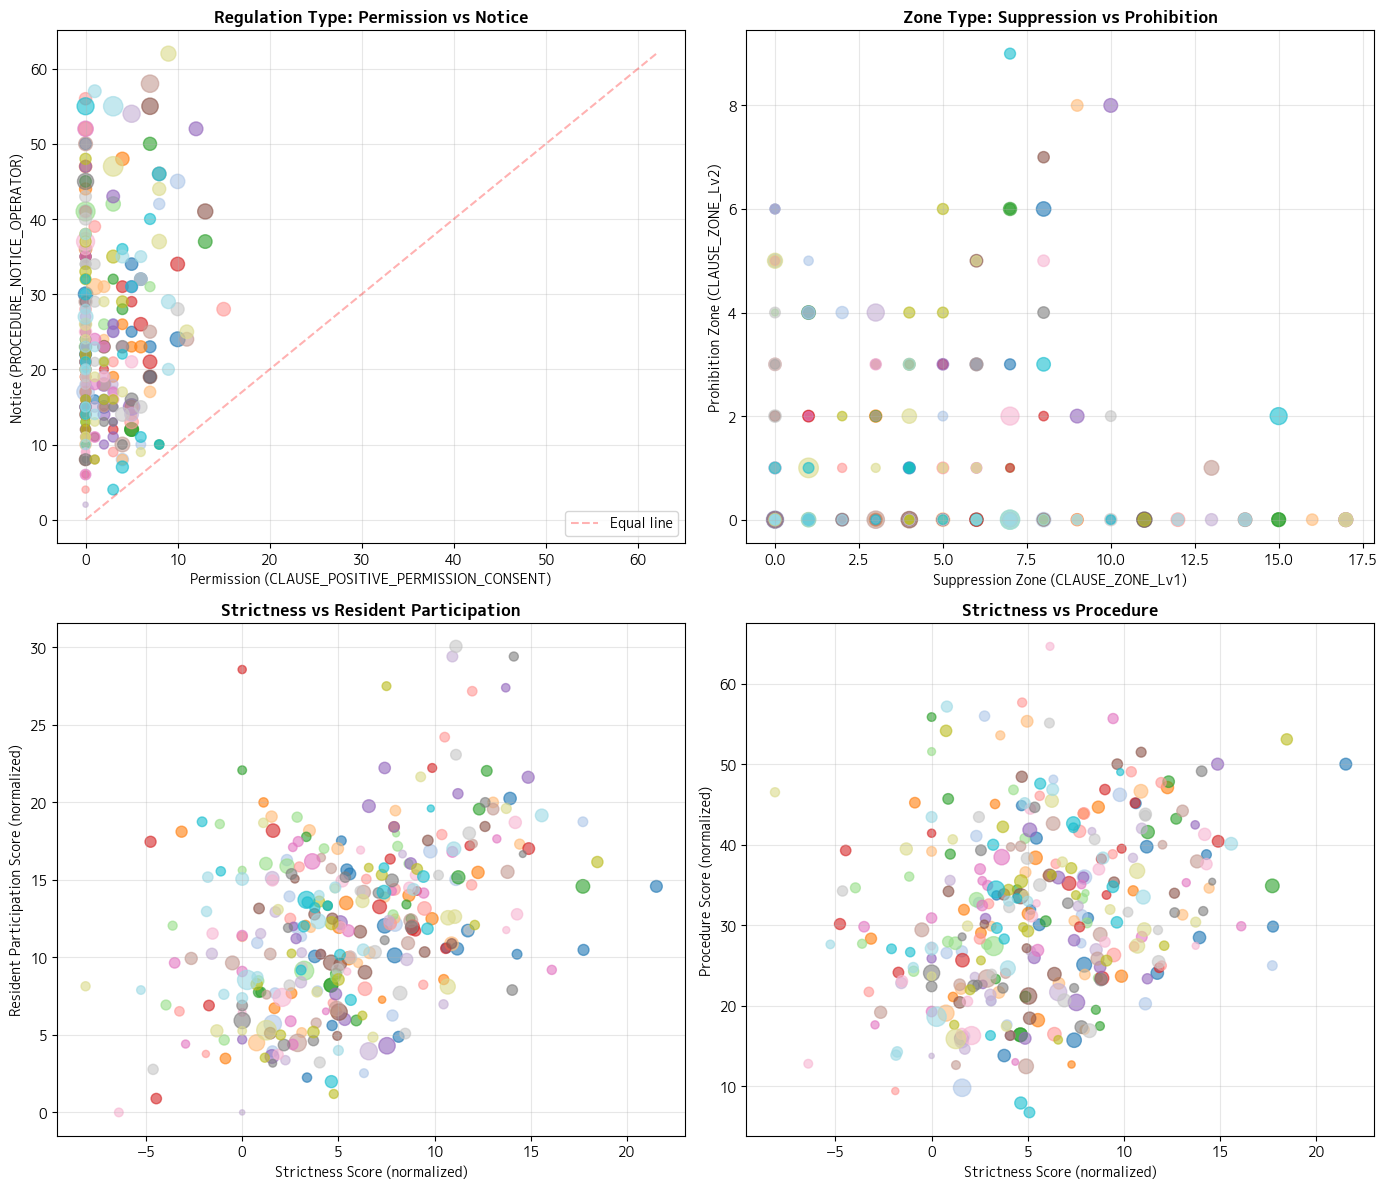

保存されたファイルサイズ: 1,640,051 bytes


In [28]:
# matplotlib のバックエンドを確認・設定
import matplotlib
print(f"Current matplotlib backend: {matplotlib.get_backend()}")

# Jupyter Notebook での画像表示を有効にする
%matplotlib inline

# 散布図: 許可 vs 届出
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. 許可 vs 届出
ax1 = axes[0, 0]
scatter1 = ax1.scatter(df_with_residuals['*CLAUSE_POSITIVE_PERMISSION_CONSENT'], 
                       df_with_residuals['*PROCEDURE_NOTICE_OPERATOR'],
                       s=df_with_residuals['ケース数']/2,
                       alpha=0.6, 
                       c=range(len(df_with_residuals)), 
                       cmap='tab20')
ax1.set_xlabel('Permission (CLAUSE_POSITIVE_PERMISSION_CONSENT)', fontsize=10)
ax1.set_ylabel('Notice (PROCEDURE_NOTICE_OPERATOR)', fontsize=10)
ax1.set_title('Regulation Type: Permission vs Notice', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
# 対角線を追加
max_val = max(df_with_residuals['*CLAUSE_POSITIVE_PERMISSION_CONSENT'].max(), 
              df_with_residuals['*PROCEDURE_NOTICE_OPERATOR'].max())
ax1.plot([0, max_val], [0, max_val], 'r--', alpha=0.3, label='Equal line')
ax1.legend()

# 2. 抑制区域 vs 禁止区域
ax2 = axes[0, 1]
scatter2 = ax2.scatter(df_with_residuals['*CLAUSE_ZONE_Lv1'], 
                       df_with_residuals['*CLAUSE_ZONE_Lv2'],
                       s=df_with_residuals['ケース数']/2,
                       alpha=0.6,
                       c=range(len(df_with_residuals)),
                       cmap='tab20')
ax2.set_xlabel('Suppression Zone (CLAUSE_ZONE_Lv1)', fontsize=10)
ax2.set_ylabel('Prohibition Zone (CLAUSE_ZONE_Lv2)', fontsize=10)
ax2.set_title('Zone Type: Suppression vs Prohibition', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. 厳格度スコア vs 住民参加スコア
ax3 = axes[1, 0]
scatter3 = ax3.scatter(df_with_residuals['厳格度スコア(正規化)'], 
                       df_with_residuals['住民参加スコア(正規化)'],
                       s=df_with_residuals['ケース数']/2,
                       alpha=0.6,
                       c=range(len(df_with_residuals)),
                       cmap='tab20')
ax3.set_xlabel('Strictness Score (normalized)', fontsize=10)
ax3.set_ylabel('Resident Participation Score (normalized)', fontsize=10)
ax3.set_title('Strictness vs Resident Participation', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. 厳格度スコア vs 手続きスコア
ax4 = axes[1, 1]
scatter4 = ax4.scatter(df_with_residuals['厳格度スコア(正規化)'], 
                       df_with_residuals['手続きスコア(正規化)'],
                       s=df_with_residuals['ケース数']/2,
                       alpha=0.6,
                       c=range(len(df_with_residuals)),
                       cmap='tab20')
ax4.set_xlabel('Strictness Score (normalized)', fontsize=10)
ax4.set_ylabel('Procedure Score (normalized)', fontsize=10)
ax4.set_title('Strictness vs Procedure', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)

# レイアウト調整
plt.tight_layout()

# 画像ファイルとして保存
output_image_path = '/home/ubuntu/cur/isep/solar_rule_v1.1_scatter.png'
plt.savefig(output_image_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"散布図を保存しました: {output_image_path}")

# Jupyter Notebook内で画像表示
plt.show()

# 保存された画像ファイルの情報を確認
import os
if os.path.exists(output_image_path):
    file_size = os.path.getsize(output_image_path)
    print(f"保存されたファイルサイズ: {file_size:,} bytes")
else:
    print("エラー: 画像ファイルが保存されませんでした")

クロス集計ヒートマップを保存しました: /home/ubuntu/cur/isep/solar_rule_v1.1_crosstab.png


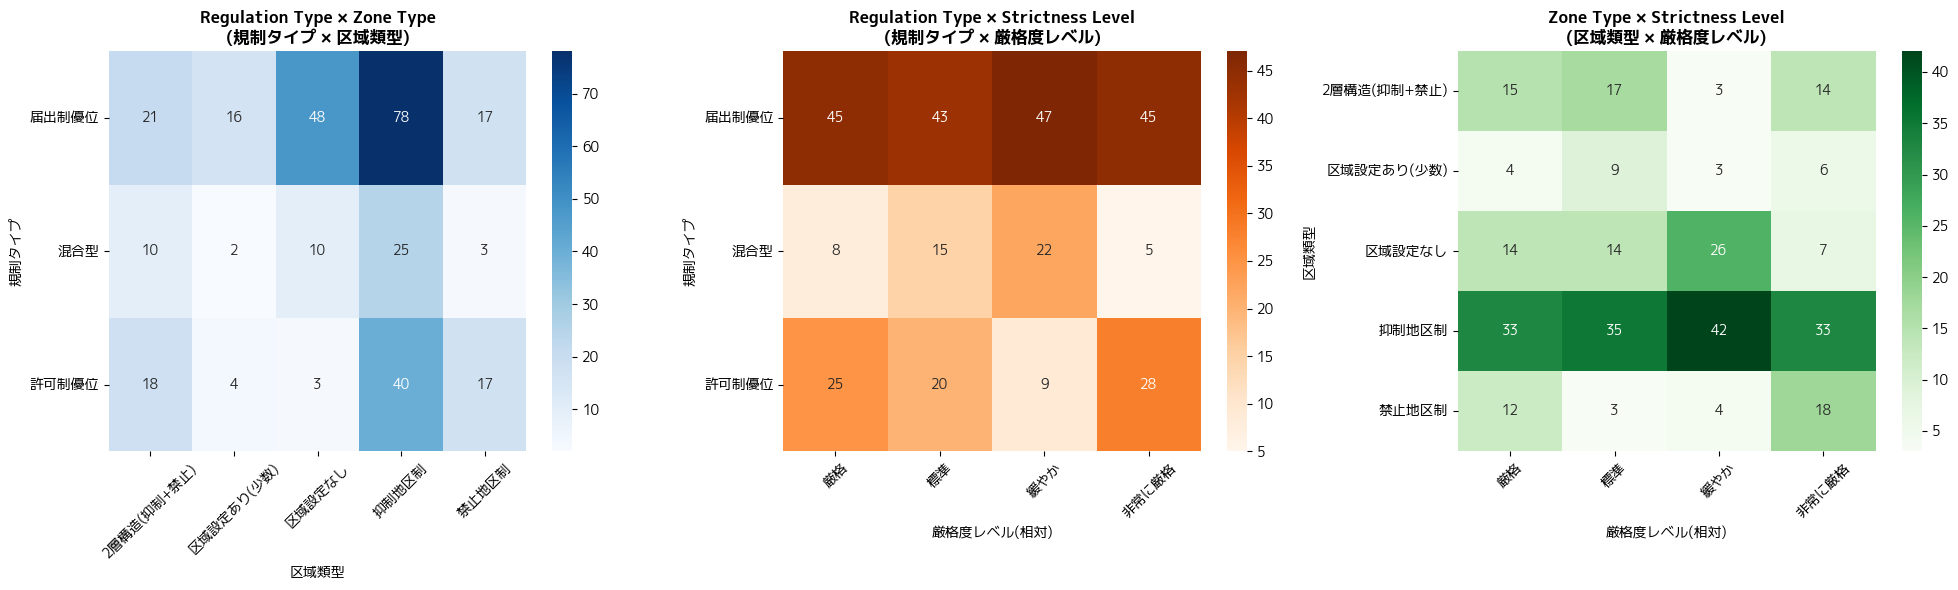

保存されたファイルサイズ: 419,082 bytes


In [29]:
# クロス集計表をヒートマップとして可視化・保存
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. 規制タイプ × 区域類型のヒートマップ
sns.heatmap(cross_tab1, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Regulation Type × Zone Type\n(規制タイプ × 区域類型)', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# 2. 規制タイプ × 厳格度レベル(相対)のヒートマップ
sns.heatmap(cross_tab2, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Regulation Type × Strictness Level\n(規制タイプ × 厳格度レベル)', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

# 3. 区域類型 × 厳格度レベル(相対)のヒートマップ
sns.heatmap(cross_tab3, annot=True, fmt='d', cmap='Greens', ax=axes[2])
axes[2].set_title('Zone Type × Strictness Level\n(区域類型 × 厳格度レベル)', fontsize=12, fontweight='bold')
axes[2].tick_params(axis='x', rotation=45)
axes[2].tick_params(axis='y', rotation=0)

# レイアウト調整
plt.tight_layout()

# クロス集計ヒートマップを保存
crosstab_image_path = '/home/ubuntu/cur/isep/solar_rule_v1.1_crosstab.png'
plt.savefig(crosstab_image_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"クロス集計ヒートマップを保存しました: {crosstab_image_path}")

# Jupyter Notebook内で表示
plt.show()

# 保存された画像ファイルの情報を確認
if os.path.exists(crosstab_image_path):
    file_size = os.path.getsize(crosstab_image_path)
    print(f"保存されたファイルサイズ: {file_size:,} bytes")
else:
    print("エラー: クロス集計ヒートマップが保存されませんでした")

## 8. まとめと考察

### 分析結果の要約

本分析では、53自治体の太陽光発電規制条例を以下の4つの観点から分類しました:

1. **規制タイプ**: 許可制優位・届出制優位・混合型
2. **区域類型**: 禁止地区制・抑制地区制・2層構造・区域設定なし
3. **厳格度レベル**: 非常に厳格・厳格・標準・緩やか
4. **プロセス重視度**: 住民参加重視型・手続き重視型・住民参加・手続き重視型・標準型

### 主な発見

- **規制タイプ**: 届出制優位が31自治体と最多で、許可制優位は16自治体、混合型は6自治体
- **区域設定**: 抑制地区制(16)と禁止地区制(13)がほぼ同数。区域設定なしも8自治体存在
- **厳格度**: 38自治体が「非常に厳格」に分類され、全体的に規制強度が高い傾向
- **住民参加**: 40自治体が「住民参加・手続き重視型」に分類され、プロセス重視の傾向が強い

### 今後の展開

- **FIT事業計画認定情報との突合**: 各自治体の太陽光発電事業件数と条例の厳格度の関係を分析
- **時系列分析**: 条例制定前後での事業展開の変化を追跡
- **地理的分析**: 地域特性(地形・土地利用など)と条例内容の関連性を検討
- **コーディングルールの改善**: レポートで指摘された改善点(住民同意取得義務の追加など)を反映